# KHALLWA - INDENTIFICACIÓN DE ARÁNDANO  

## Instalación de librerías: Tensorflow - Keras - Mask RCNN

Ejecutar las siguientes celdas:

Versiones compatibles:

-tensorflow - 1.15.2 

-keras - 2.1.6

-hp5y - 2.7.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow
print(tensorflow.__version__)

1.15.2


Instalar inicialmente keras 2.0.8 

In [ ]:
!pip install q keras==2.0.8 

     |████████████████████████████████| 276kB 16.8MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.8 which is incompatible.
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [ ]:
import os 
import sys
import random
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
#import pydicom
from imgaug import augmenters as iaa
from tqdm import tqdm
import pandas as pd 
import glob 
import skimage.draw


In [ ]:
Clonar el repositorio de Mask RCNN

In [ ]:
!git clone https://www.github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.24 MiB | 40.79 MiB/s, done.
Resolving deltas: 100% (559/559), done.


In [ ]:
os.chdir('Mask_RCNN')

In [ ]:
ROOT_DIR = '/content/drive/My Drive/TESIS/'

In [ ]:
sys.path.append(os.path.join(ROOT_DIR, 'Mask_RCNN'))  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
#from keras import preprocessing
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

Using TensorFlow backend.


In [ ]:
# Los siguientes parámetros se han seleccionado para reducir el tiempo de ejecución con fines de demostración
# Estos se irán ajustando para llegar a ser los óptimos

class DetectorConfig(Config):
    """Configuración para entrenar el conjunto de datos de blueberry.
    Anula los valores de la clase de configuración básica.
    """
    
    NAME = 'blueberries'
    
    LEARNING_RATE = 0.006

    GPU_COUNT = 1
    IMAGES_PER_GPU = 8
    
    BACKBONE = 'resnet50'
    
    NUM_CLASSES = 2  # background + 1 class; 1 fruit classe blueberry (ripe, unripe)
    
    IMAGE_MIN_DIM = 512#256
    IMAGE_MAX_DIM = 512#256
    RPN_ANCHOR_SCALES = (16, 32, 64, 128, 256)
    TRAIN_ROIS_PER_IMAGE = 32

    STEPS_PER_EPOCH = 25
    
config = DetectorConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     8
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 8
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.006
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

In [ ]:
MODEL_DIR = os.path.join(ROOT_DIR, 'logs')
print(MODEL_DIR)

/content/drive/My Drive/TESIS/logs


In [ ]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


In [ ]:
# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
print(COCO_MODEL_PATH)

/content/drive/My Drive/TESIS/mask_rcnn_coco.h5


Reinstalar keras con la versión compatible utilizando una instalación forzosa, una completado reinicar el entorno y volver a ejecutar las celdas incluida la de tensorflow

In [ ]:
!pip install 'keras==2.1.6' --force-reinstall

     |████████████████████████████████| 348kB 10.5MB/s 
     |████████████████████████████████| 276kB 36.1MB/s 
     |████████████████████████████████| 14.5MB 255kB/s 
     |████████████████████████████████| 4.0MB 60.0MB/s 
     |████████████████████████████████| 25.9MB 86kB/s 
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=2ccdef7cd7a3ffb6ab557684160ee2211780b2f46d8cf89501a92046b36f40cf
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built pyyaml
ERROR: tensorflow 1.15.2 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
ERROR: nbclient 0.5.1 has requirement jupyter-client>=6.1.5, but you'll have jupyter-client 5.3.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2

In [ ]:
!pip install h5py==2.7.0

     |████████████████████████████████| 4.8MB 9.2MB/s 
ERROR: tensorflow 2.3.0 has requirement h5py<2.11.0,>=2.10.0, but you'll have h5py 2.7.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.4 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.5.4 which is incompatible.
  Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
# Pesos de la red iniciales
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Cargar peso de MS COCO, pero saltar las capas
    # que son diferentes a las clases a entrenar
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Cargar los últimos pesos y seguir entrenando
    model.load_weights(model.find_last(), by_name=True)

In [ ]:
class DetectorDataset(utils.Dataset):
    """Dataset class for training blueberry.
    """
    
    def load_labels(self, labels_list):
        for i, label in enumerate(labels_list):
            self.add_class('fruits', i + 1, label)
            
    def load_dataset(self, images_obj):
        for image_obj in images_obj:
            image_id = image_obj['image_id']
            image_path = image_obj['image_path']
            num_ids = image_obj['num_ids']
            polygons = image_obj['polygons']
            width = image_obj['width']
            height = image_obj['height']
            self.add_image("fruits", image_id=image_id, path=image_path,
                           width=width, height=height, polygons=polygons,num_ids=num_ids)
            
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

    def draw_shape(self, image, shape, dims, color):
        """Draws a shape from the given specs."""
        # Get the center x, y and the size s
        x, y, s = dims
        if shape == 'square':
            cv2.rectangle(image, (x-s, y-s), (x+s, y+s), color, -1)
        elif shape == "circle":
            cv2.circle(image, (x, y), s, color, -1)
        elif shape == "triangle":
            points = np.array([[(x, y-s),
                                (x-s/math.sin(math.radians(60)), y+s),
                                (x+s/math.sin(math.radians(60)), y+s),
                                ]], dtype=np.int32)
            cv2.fillPoly(image, points, color)
        return image

    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        info = self.image_info[image_id]
        num_ids = info['num_ids']
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)

        for i, p in enumerate(info["polygons"]):
            # Get indexes of pixels inside the polygon and set them to 1
            rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
            mask[rr, cc, i] = 1

        num_ids = np.array(num_ids, dtype=np.int32)
        return mask, num_ids

In [ ]:
train_image_path = os.path.join('/content/drive/My Drive/TESIS/data/', 'blueberry')
test_image_path = os.path.join('/content/drive/My Drive/TESIS/data/', 'blueberry')

In [ ]:
!pip install xmltodict

In [ ]:
#labels = ["blueberry_ripe", "blueberry_unripe"]
labels = ["blueberry"]

In [ ]:
def parse_single_annotation(label_obj):
    #print(label_obj)
    name = label_obj['name']
    # Get label
    num_id = labels.index(name) + 1
    bb_box = label_obj['bndbox']
    # Extract the xmin xmax ymin and ymax of bounding box
    xmin = int(bb_box['xmin'])
    xmax = int(bb_box['xmax'])
    ymin = int(bb_box['ymin'])
    ymax = int(bb_box['ymax'])
    # Convert it into polygon format. So we need 5 points for both x and y
    all_points_x = [xmin, xmax, xmax, xmin, xmin]
    all_points_y = [ymin, ymin, ymax, ymax, ymin]
    return all_points_x, all_points_y, num_id

In [ ]:
import xmltodict
import json
train_images = []
def transform_annotations(image_path):
    # Start the index from 100
    curr_idx = 100
    images_list = []
    # List the files in the training or test path
    for i in os.listdir(os.path.join(image_path)):
        # Get the image path
        img_path = os.path.join(image_path, i)
        split_img_path = i.split('.')
        # check if the file is a .jpg ext. We ignore .xml file as they will be parsed based on .jpg file name
        if split_img_path[1] == 'jpg':
            # Define dict key value pair required in coco dataset
            polygons = []
            num_ids = []
            # Read the image file 
            file_data = cv2.imread(img_path)
            # Get the heigh and width. OpenCV shape is in the format h, w, depth
            height, width, _ = file_data.shape
            # Open the xml file which has the same name of the image we have opened for this iteration
            with open(os.path.join(image_path, split_img_path[0] + '.xml')) as fd:
                # Load the xml -> convert xml to dict -> convert to json
                bb_file = json.loads(json.dumps(xmltodict.parse(fd.read())))
                # There are two case - bb_file['annotation']['object'] can exist as a single dict or as a list of dict.
                # Thus, we need to do a check to see whether it is a list or not.
                # If the value is a data type of list:
                if isinstance(bb_file['annotation']['object'], list):
                    # Loop through each dict in the list
                    for obj in bb_file['annotation']['object']:
                        # Parse each annotation individually
                        all_points_x, all_points_y, num_id = parse_single_annotation(obj)
                        # Append the points into polygon list
                        polygons.append({
                            'all_points_x': all_points_x,
                            'all_points_y': all_points_y
                        })
                        # Append the id into the num_ids list
                        num_ids.append(num_id)
                # If the ['object'] key only contains a dict value
                else:
                    # We just need to parse a single annotation
                    all_points_x, all_points_y, num_id = parse_single_annotation(bb_file['annotation']['object'])
                    # Append it into polygon and num_ids list
                    polygons.append({
                        'all_points_x': all_points_x,
                        'all_points_y': all_points_y
                    })
                    num_ids.append(num_id)
            # For this image, we need to create a dict to represent it and all the corresponding annotations represented by polygons and num_ids key list
            image_label = {
                'image_path': img_path,
                'image_id': curr_idx,
                'polygons': polygons,
                'num_ids': num_ids,
                'height': height,
                'width': width
            }
            curr_idx = curr_idx + 1
            # Append it into the images_list
            images_list.append(image_label)
    return images_list

In [ ]:
train_images = transform_annotations(os.path.join(train_image_path, 'train'))
print(train_images[0:5])
dataset_train = DetectorDataset()
dataset_train.load_labels(labels)
dataset_train.load_dataset(train_images)
dataset_train.prepare()

[{'image_path': '/content/drive/My Drive/TESIS/data/blueberry/train/IMG_1061.jpg', 'image_id': 100, 'polygons': [{'all_points_x': [2160, 2645, 2645, 2160, 2160], 'all_points_y': [133, 133, 623, 623, 133]}, {'all_points_x': [2595, 3026, 3026, 2595, 2595], 'all_points_y': [224, 224, 646, 646, 224]}, {'all_points_x': [2586, 3039, 3039, 2586, 2586], 'all_points_y': [863, 863, 1289, 1289, 863]}, {'all_points_x': [1815, 2323, 2323, 1815, 1815], 'all_points_y': [609, 609, 1131, 1131, 609]}, {'all_points_x': [1792, 2364, 2364, 1792, 1792], 'all_points_y': [1112, 1112, 1661, 1661, 1112]}, {'all_points_x': [1394, 1897, 1897, 1394, 1394], 'all_points_y': [940, 940, 1439, 1439, 940]}, {'all_points_x': [1933, 2296, 2296, 1933, 1933], 'all_points_y': [1588, 1588, 2010, 2010, 1588]}, {'all_points_x': [1425, 1983, 1983, 1425, 1425], 'all_points_y': [1471, 1471, 2051, 2051, 1471]}, {'all_points_x': [936, 1439, 1439, 936, 936], 'all_points_y': [1289, 1289, 1847, 1847, 1289]}, {'all_points_x': [1072, 156

In [ ]:
test_images = transform_annotations(os.path.join(test_image_path, 'test'))
dataset_val = DetectorDataset()
dataset_val.load_labels(labels)
dataset_val.load_dataset(test_images)
dataset_val.prepare()

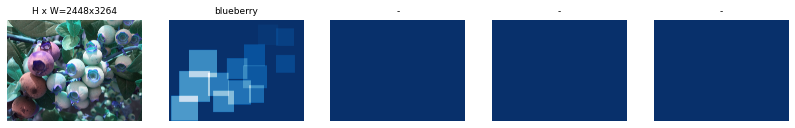

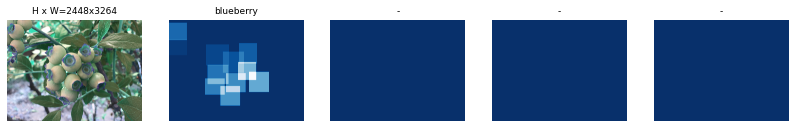

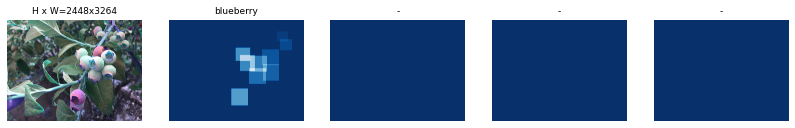

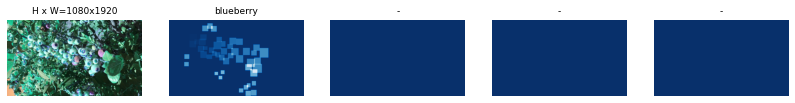

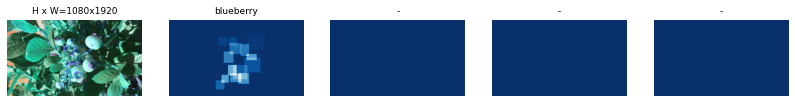

In [ ]:
from mrcnn import visualize
for i in range(5):
    image_id = train_images[i]['image_id']
    mask, num_id = dataset_train.load_mask(i)
    img_data = cv2.imread(train_images[i]['image_path'])
    num_id = [x - 1 for x in num_id]
    visualize.display_top_masks(img_data, mask, num_id, labels)

In [ ]:
!cd /kaggle && mkdir project
sys.path.append(ROOT_DIR)
MODEL_DIR = os.path.join(ROOT_DIR, 'logs')
# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

/bin/bash: line 0: cd: /kaggle: No such file or directory


In [ ]:
MODEL_DIR = os.path.join(ROOT_DIR, 'logs')
print(MODEL_DIR)

/content/drive/My Drive/TESIS/logs


In [ ]:
print(COCO_MODEL_PATH)

/content/drive/My Drive/TESIS/mask_rcnn_coco.h5


In [ ]:
# Cargar el último modelo y los pesos para seguir entrenando
model_last_path='/content/drive/My Drive/TESIS/logs/blueberries20201108T2312/mask_rcnn_blueberries_0055.h5'
model.load_weights(model_last_path, by_name=True)

Re-starting from epoch 55


In [ ]:
# Crear modelo en modo entrenamiento
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

In [ ]:
# Entrena las ramas de la cabeza
# Pasar capas = "cabezas" congela todas las capas excepto la capa cabeza
# También se puede pasar una expresión regular para seleccionar
# qué capas entrenar por patrón de nombre.
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=65, 
            layers='heads')


Starting at epoch 55. LR=0.006

Checkpoint Path: /content/drive/My Drive/TESIS/logs/blueberries20201108T2312/mask_rcnn_blueberries_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDist

/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2087: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers 

Epoch 56/65
24/25 [===========================>..] - ETA: 5s - loss: 1.5876 - rpn_class_loss: 0.1836 - rpn_bbox_loss: 0.3519 - mrcnn_class_loss: 0.3578 - mrcnn_bbox_loss: 0.3308 - mrcnn_mask_loss: 0.3635 

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2348: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


25/25 [==============================] - 515s 21s/step - loss: 1.5960 - rpn_class_loss: 0.1839 - rpn_bbox_loss: 0.3553 - mrcnn_class_loss: 0.3607 - mrcnn_bbox_loss: 0.3321 - mrcnn_mask_loss: 0.3640 - val_loss: 2.1719 - val_rpn_class_loss: 0.2962 - val_rpn_bbox_loss: 0.6997 - val_mrcnn_class_loss: 0.3700 - val_mrcnn_bbox_loss: 0.4144 - val_mrcnn_mask_loss: 0.3916
Epoch 57/65
25/25 [==============================] - 332s 13s/step - loss: 1.5255 - rpn_class_loss: 0.1608 - rpn_bbox_loss: 0.3283 - mrcnn_class_loss: 0.3644 - mrcnn_bbox_loss: 0.3137 - mrcnn_mask_loss: 0.3583 - val_loss: 2.0092 - val_rpn_class_loss: 0.2664 - val_rpn_bbox_loss: 0.5630 - val_mrcnn_class_loss: 0.4019 - val_mrcnn_bbox_loss: 0.4079 - val_mrcnn_mask_loss: 0.3701
Epoch 58/65
25/25 [==============================] - 333s 13s/step - loss: 1.5664 - rpn_class_loss: 0.1724 - rpn_bbox_loss: 0.3492 - mrcnn_class_loss: 0.3576 - mrcnn_bbox_loss: 0.3174 - mrcnn_mask_loss: 0.3697 - val_loss: 1.9980 - val_rpn_class_loss: 0.2676 

In [ ]:
os.listdir(MODEL_DIR)

['fruits20201015T0512',
 'fruits20201023T0013',
 'blueberries20201023T2342',
 'blueberries20201024T0224',
 'blueberries20201024T0410',
 'blueberries20201108T1821',
 'blueberries20201108T2312']

In [ ]:
dir_names = os.listdir(MODEL_DIR)
dir_names = sorted(dir_names)

fps = []
# Pick last directory
for d in dir_names: 
    dir_name = os.path.join(MODEL_DIR, d)
    # Find the last checkpoint
    checkpoints = next(os.walk(dir_name))[2]
    checkpoints = filter(lambda f: f.startswith("mask_rcnn"), checkpoints)
    checkpoints = sorted(checkpoints)
    if not checkpoints:
        print('No weight files in {}'.format(dir_name))
    else: 
      
      checkpoint = os.path.join(dir_name, checkpoints[-1])
      fps.append(checkpoint)

model_path = sorted(fps)[-1]
print('Found model {}'.format(model_path))

Found model /content/drive/My Drive/TESIS/logs/fruits20201023T0013/mask_rcnn_fruits_0030.h5


In [ ]:
model_path='/content/drive/My Drive/TESIS/logs/blueberries20201108T2312/mask_rcnn_blueberries_0065.h5'
print('Found model {}'.format(model_path))

Found model /content/drive/My Drive/TESIS/logs/blueberries20201108T2312/mask_rcnn_blueberries_0065.h5


In [ ]:
class InferenceConfig(DetectorConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recrea el modelo en modo de inferencia
model = modellib.MaskRCNN(mode='inference', 
                          config=inference_config,
                          model_dir=ROOT_DIR)

# Carga los pesos de ese modelo
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /content/drive/My Drive/TESIS/logs/blueberries20201108T2312/mask_rcnn_blueberries_0065.h5
Re-starting from epoch 65


In [ ]:
# set color for class
def get_colors_for_class_ids(class_ids):
    class_ids = [x - 1 for x in class_ids]
    colors = []
    for class_id in class_ids:
        if class_id == 1:
            colors.append((.941, .204, .204))
    return colors

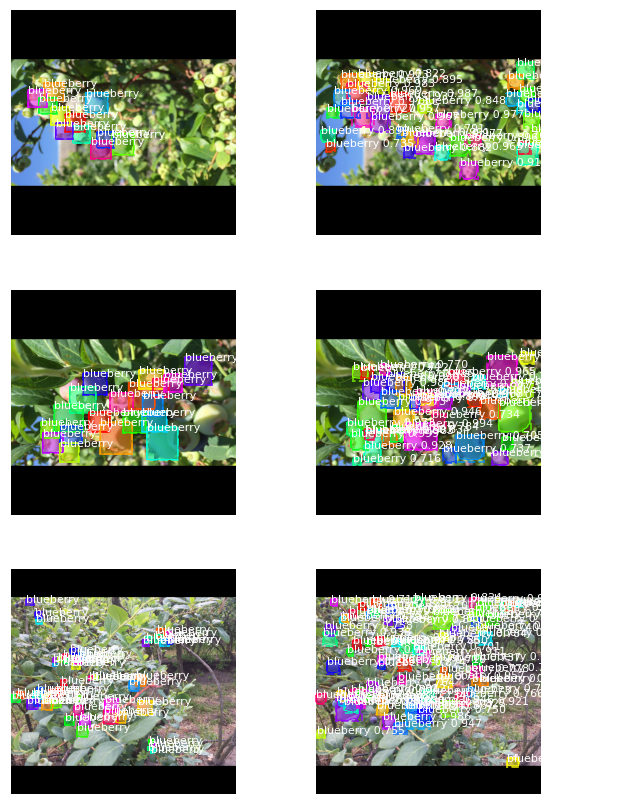

In [ ]:
# Muestra algunos ejemplos del dataset frente a predicciones en el conjunto de datos de validación 
dataset = dataset_val
fig = plt.figure(figsize=(10, 30))
start_idx = 0
for i in range(start_idx, start_idx + 3):
    
    image_id = random.choice(dataset.image_ids)
    
    original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config, 
                               image_id, use_mini_mask=False)
    plt.subplot(6, 2, 2*(i-start_idx) + 1)
    visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                                dataset.class_names,
                                colors=get_colors_for_class_ids(gt_class_id), ax=fig.axes[-1])
    
    plt.subplot(6, 2, 2*(i-start_idx) + 2)
    results = model.detect([original_image]) #, verbose=1)
    r = results[0]
    visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                                dataset.class_names, r['scores'], 
                                colors=get_colors_for_class_ids(r['class_ids']), ax=fig.axes[-1])

In [ ]:
# COCO Class names
#class_names = ["BG","ripe","unripe"]
class_names = ["BG","blueberry"]

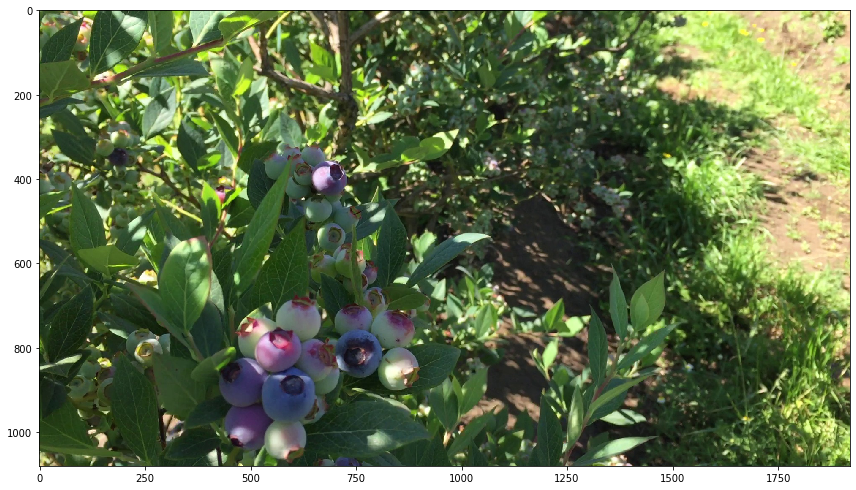

In [ ]:
# Cargar una imagen
image = skimage.io.imread('/content/drive/My Drive/TESIS/blueberry_09.jpg')
#image = skimage.io.imread('/content/drive/My Drive/TESIS/mix_test.jpg')
#image = skimage.io.imread('/content/drive/My Drive/TESIS/test_person.jpg')
#image = skimage.io.imread('/content/drive/My Drive/TESIS/orange_test.jpg')
# original image
plt.figure(figsize=(12,10))
skimage.io.imshow(image)

Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.35425  max:    1.22900  float32


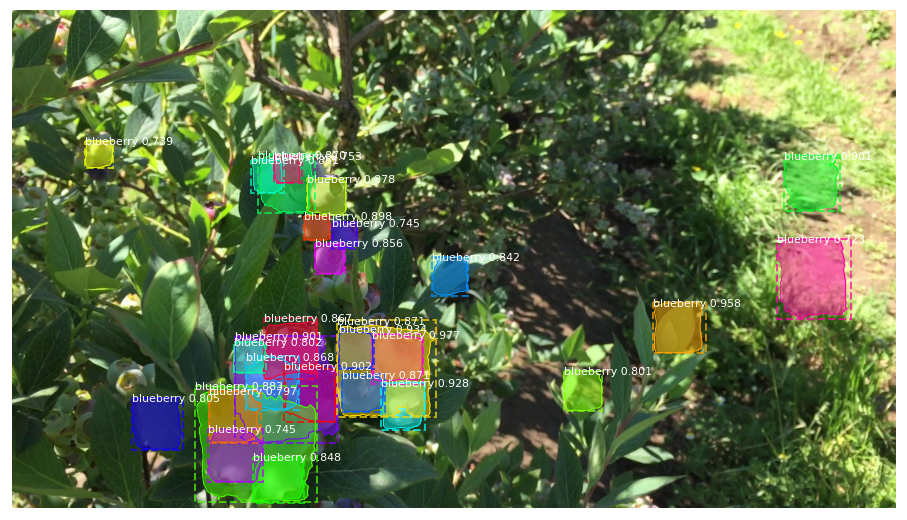

In [ ]:
# Ejecutar la detección
results = model.detect([image], verbose=1)

# Visualizar resultados
r = results[0]
#visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [ ]:
Ejecutar las siguientes celdas para la identificación

In [ ]:
import matplotlib.patches as patches
from google.colab.patches import cv2_imshow
#Leer la imagen
image_post=cv2.imread( '/content/drive/My Drive/TESIS/blueberry_06.jpg')
im=cv2.cvtColor(image_post, cv2.COLOR_BGR2RGB)

fig,ax=plt.subplots(1,figsize=(12, 12))
#Región de indentificación de arándanos obtenida del modelo de detección
y1, x1, y2, x2 = region_bbox[5]

rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2,
                                alpha=0.7, linestyle="dashed",
                                edgecolor='r', facecolor='none')


im=im[y1:y2,x1:x2]# obtiene el área recortada
npIm=np.array(im)
plt.imshow(npIm)
#print(npIm)






In [ ]:
#Algortimo de K-means de OpenCV para detectar color predominante
pixels = np.float32(npIm.reshape(-1, 3))

n_colors = 2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)

In [ ]:
#Se verifica si el predominante es el azul o verde para identificar el estado de madurez
dominant = palette[np.argmax(counts)]
d_max=dominant.max()
d_max
bb_clasi="undefined"
if d_max == dominant[1]:
  bb_clasi="unripe"
elif d_max == dominant[2]:
  bb_clasi="ripe"

bb_clasi
#dominant[0]

'ripe'

In [ ]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
import numpy as np
image_ids = np.random.choice(dataset_val.image_ids, 10)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    APs.append(AP)
    
print("mAP: ", np.mean(APs))